# Сборный проект

## Шаг 1. Откройте файл с данными и изучите общую информацию
* Путь к файлу:
* /datasets/games.csv
* /datasets/rating.csv — данные о рейтинге ESRB
## Шаг 2. Подготовьте данные
* Замените названия столбцов.
* Посчитайте количество продаж во всех регионах и запишите в отдельный столбец.
* Приведите данные к нужным типам:
* Опишите, в каких столбцах пришлось заменить тип данных и почему
* Обработайте пропуски при необходимости:
* Если вы решили заполнить пропуски определённым образом или не заполнять совсем — объясните, почему;
* Опишите возможные причины возникновения пропусков
## Шаг 3. Проведите исследовательский анализ данных
* Постройте распределение по годам релиза и опишите полученный результат
* Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
* Постройте график продаж по каждому году; сделайте вывод
* Постройте ящик с усами по глобальным продажам, опишите полученный результат
* Узнайте, на какой платформе было выпущено больше всего игр
* Определите, игр какого жанра больше всего
* Найдите игры с наибольшей и наименьшей оценкой от пользователей
* Найдите игры с наибольшей и наименьшей оценкой от критиков
* Оцените корреляцию между оценками критиков и пользовательскими оценками.
## Шаг 4. Составьте портрет пользователя для каждого региона
### Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:
* топ-5 предпочтительных жанров
* в какие года пользователи были наиболее активны (больше всего покупали игры)
* топ-5 предпочтительных платформ
* какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)
## Шаг 4. Проверьте гипотезы:
* средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
* средний пользовательский рейтинг жанров Action и Sports различается.
* Пороговое значение alpha задайте самостоятельно.
### Поясните:
* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.
## Шаг 5. Напишите общий вывод
* Оформление: Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки

-----
-----

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10000)
import math
import seaborn as sns
import matplotlib as plt

In [2]:
df_game = pd.read_csv('/datasets/games.csv')
df_rating = pd.read_csv('/datasets/rating.csv')
df_game.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df_game.head()

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df_rating.head()

,rating_type,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)


In [5]:
df_rating.rating_type.unique()#.shape

array(['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [6]:
df_game.Rating.unique()#.shape

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### Проверим наличие пропущенных значений

In [7]:
(df_game.isna().sum()/df_game.shape[0]).sort_values(ascending=False)

Critic_Score       0.513308
Rating             0.404869
User_Score         0.400981
Year_of_Release    0.016089
Genre              0.000120
Name               0.000120
Other_players      0.000000
RU_players         0.000000
EU_players         0.000000
NA_players         0.000000
Platform           0.000000
dtype: float64

In [8]:
(df_rating.isna().sum()/df_rating.shape[0]).sort_values(ascending=False)

decryption     0.0
rating_type    0.0
dtype: float64

### Проверим типы данных

In [9]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
NA_players         16719 non-null float64
EU_players         16719 non-null float64
RU_players         16719 non-null float64
Other_players      16719 non-null float64
Critic_Score       8137 non-null float64
User_Score         10015 non-null object
Rating             9950 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
rating_type    8 non-null object
decryption     8 non-null object
dtypes: object(2)
memory usage: 208.0+ bytes


### Проверим датафреймы на дубликаты по строкам

In [11]:
df_rating.duplicated().sum()

0

In [12]:
df_game.duplicated().sum()

0

### Проверим датафрейм на скрытые NaN, распечатав наиболее популярные значения в колонках
* Нашли известный NaN -  tbd

In [13]:
for col in df_game.select_dtypes(['object', 'bool']).columns:
    temp = df_game[col].value_counts().to_frame()
    print(temp.head(10))

                              Name
Need for Speed: Most Wanted     12
Ratatouille                      9
LEGO Marvel Super Heroes         9
Madden NFL 07                    9
FIFA 14                          9
Madden NFL 08                    8
Terraria                         8
Lego Batman 3: Beyond Gotham     8
LEGO Jurassic World              8
Cars                             8
      Platform
PS2       2161
DS        2152
PS3       1331
Wii       1320
X360      1262
PSP       1209
PS        1197
PC         974
XB         824
GBA        822
              Genre
Action         3370
Sports         2348
Misc           1750
Role-Playing   1500
Shooter        1323
Adventure      1303
Racing         1249
Platform        888
Simulation      874
Fighting        849
     User_Score
tbd        2425
7.8         324
8           290
8.2         282
8.3         254
8.5         253
7.5         251
7.9         249
8.1         244
7.7         240
      Rating
E       3991
T       2961
M       1563
E1

----
----

# Шаг 2. Подготовьте данные

## Замените названия столбцов.

In [14]:
df_game.rename(columns={'Year_of_Release':'year'}, inplace=True)
df_game.columns = [name.lower() for name in list(df_game.columns)]

In [15]:
df_rating.columns = ['rating','decryption'] # ошибка в слове description или имелось ввиду "дешифрование"?

In [16]:
df_game.head()

,name,platform,year,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [17]:
df_rating.head()

,rating,decryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)


----
----

## Посчитайте количество продаж во всех регионах и запишите в отдельный столбец.

In [18]:
df_game['total_players'] = df_game.na_players + df_game.eu_players + df_game.ru_players + df_game.other_players

----
----

### 1. Приведите данные к нужным типам. Опишите, в каких столбцах пришлось заменить тип данных и почему
### 2. Опишите, в каких столбцах пришлось заменить тип данных и почему
### 3. Обработайте пропуски при необходимости

# Колонка year

### Есть проблема, в части названий игр год пропущен. 

In [19]:
print('Таких игр', df_game[df_game['year'].isna()]['name'].nunique(),'штуки')

Таких игр 232 штуки


### Для одних можно восстановить год, распарсив название и отрезав 4 последние цифры

In [20]:
df_game[df_game['year'].isna()][['name']].head()

,name
183,Madden NFL 2004
377,FIFA Soccer 2004
456,LEGO Batman: The Videogame
475,wwe Smackdown vs. Raw 2006
609,Space Invaders


In [21]:
df_game.shape

(16719, 12)

### Для других названий, у которых нет года в имени, можно найти год выпуска на других платформах

In [22]:
df_game.query('name =="LEGO Harry Potter: Years 5-7"')

,name,platform,year,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,total_players
1609,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,0.69,0.42,0.0,0.12,76.0,7.8,E10+,1.23
2132,LEGO Harry Potter: Years 5-7,X360,NaN,Action,0.51,0.37,0.0,0.09,77.0,7.9,E10+,0.97
2273,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,0.36,0.41,0.0,0.15,76.0,8.3,E10+,0.92
3081,LEGO Harry Potter: Years 5-7,DS,NaN,Action,0.34,0.25,0.0,0.07,69.0,tbd,E10+,0.66
4818,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.0,0.03,71.0,6.5,E10+,0.40
6477,LEGO Harry Potter: Years 5-7,PSP,NaN,Action,0.10,0.10,0.0,0.06,NaN,tbd,E10+,0.26
7211,LEGO Harry Potter: Years 5-7,PC,NaN,Action,0.05,0.14,0.0,0.03,80.0,8.5,E10+,0.22
8060,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,0.07,0.07,0.0,0.03,64.0,6.8,E10+,0.17


### Попробуем пойти вторым способом и сразу для всех уникальных названий найдем год выпуска

### Сохраним в отдельный датафрейм temp_year название игры и год, где нет NaN

In [23]:
temp_year = df_game[df_game['year'].isna()==False][['name','year']]

In [24]:
temp_year.shape

(16450, 2)

### Удалим дубликаты в датафрейме temp_year по имени

In [25]:
temp_year.drop_duplicates(subset = 'name', keep = 'first', inplace = True)

In [26]:
temp_year.shape

(11430, 2)

### Присоединим temp_year к нашему датафрейму по столбцу с именем

In [27]:
df_game.shape

(16719, 12)

In [28]:
df_game = df_game.merge(temp_year, on='name', how='left')

In [29]:
df_game[df_game.year_x.isna()].head()

,name,platform,year_x,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,total_players,year_y
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24,2003.0
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50,2003.0
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06,2008.0
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53,1994.0


### Посмотрим, сколько осталось игр, у которых не получилось выделить год на других платформах

In [30]:
#df.drop_duplicates(subset = ['name','platform'], keep = 'first', inplace = True)

In [31]:
df_game[df_game['year_x'].isna()].query('year_y == "nan"').shape

(146, 13)

### Осталось 146 из 232 NaN, в которых не получится заменить год

### Заменим пропуски года в изначальной колонке и дропнем временную колонку year_y

In [32]:
df_game.loc[df_game.year_x.isna(),'year_x'] = df_game.year_y

In [33]:
#Дропнем временный столбец и поменяем назавание year_x обратно на year
df_game = df_game.iloc[:,:-1].rename(columns={'year_x':'year'})

### Посмотрим, возможно ли в оставшихся записях выделить год из названия игры, если невозможно то дропнем

In [34]:
df_game[df_game['year'].isna()].head()

,name,platform,year,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,total_players
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN,3.00
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62


### Если визуально пробежаться по записям, то видно что в очень небольшом количестве имен мы можем выделить год из имени
#### Если быть точным, то только в 7 записях из 143
__Дальнейшие варианты:__  
    1. Пишу функцию чтобы заменить эти 7 значений
    2. Пробуем лемматизировать названия и найти похожие названия игр? чтобы выделить год
    3. Парсим информацию по играм с какого-либо сайта
    4. Оцениваем какой % записей у нас с пропущенным годов издания и дропаем их (выбираем этот вариант)

In [35]:
print("Доля строк в которой не получилось вытащить год: {:.2%}"\
      .format(df_game[df_game['year'].isna()].shape[0]/df_game['year'].shape[0]))

Доля строк в которой не получилось вытащить год: 0.87%


### Удалим эти 0.87% записей

In [36]:
df_game = df_game[df_game['year'].isna()==False]

### Поменяем тип данные в столбце year на int16

In [37]:
df_game['year'] = df_game['year'].astype('int16')

In [38]:
df_game.isna().sum()

name                2
platform            0
year                0
genre               2
na_players          0
eu_players          0
ru_players          0
other_players       0
critic_score     8498
user_score       6638
rating           6704
total_players       0
dtype: int64

---
---

# Колонка name

In [39]:
df_game[df_game['name'].isna()]

,name,platform,year,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,total_players
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14246,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


### Слишком много пропущенных значений в двух строках, удаляем

In [40]:
df_game = df_game[df_game['name'].isna()==False]

----
----

# Колонка user_score

In [41]:
df_game.isna().sum().sort_values(ascending=False)

critic_score     8496
rating           6702
user_score       6636
total_players       0
other_players       0
ru_players          0
eu_players          0
na_players          0
genre               0
year                0
platform            0
name                0
dtype: int64

### Помимо NaN, в user_score присутствует "скрытый NaN" - tbd. 
### Вначале заменим его на np.nan, чтобы в дальнейшем использовать стандартные методы замены .fillna

In [42]:
df_game.loc[df_game['user_score'] == 'tbd','user_score'] = np.nan

### Для использования .fillna, вначале поменяем тип данных с object на float

In [43]:
df_game['user_score'] = df_game['user_score'].astype('float16')

### Далее заменим NaN
### UPD: Пропущенные значения заменяем на 0, т.к. в задании требуется построить распределения по играм с отзывом и без. Под отзывами имеется ввиду (critic_score и user_score)

In [44]:
df_game['user_score'] = df_game['user_score'].fillna(0)

In [45]:
#Точная замена по имени на средний рейтинг по другим платформам
#df_game['user_score'] = df_game.groupby('name')['user_score'].transform(lambda x: x.fillna(x.mean()))

In [46]:
#Менее точная замена на средний рейтинг, группируя по жанру
#df_game['user_score'] = df_game.groupby('genre')['user_score'].transform(lambda x: x.fillna(x.mean()))

In [47]:
#print('После замены осталось',df_game.isna().sum()['user_score'], 'NaN')

----
----

# Колонка critic_score

### UPD: NaN значения заменяем на 0, т.к. в задании требуется построить распределения по играм с отзывом и без. Под отзывами имеется ввиду (critic_score и user_score)

In [48]:
df_game['critic_score'] = df_game['critic_score'].fillna(0)

In [49]:
#Точная замена по имени на средний рейтинг по другим платформам
#df_game['critic_score'] = df_game.groupby('name')['critic_score'].transform(lambda x: x.fillna(x.mean()))

In [50]:
#Менее точная замена на средний рейтинг, группируя по жанру
#df_game['critic_score'] = df_game.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.mean()))

In [51]:
#print('После замены осталось',df_game.isna().sum()['critic_score'], 'NaN')

----
----

# Колонка rating
* Т.к. в колонке представлены значения типа object, то нам нужно произвести замену на моду, группируя значения по genre, но для этого надо перевести значения rating в числовые.
* не смог нагуглить готового решения, поэтому написал небольшую функцию

In [52]:
def repaire_mode_from_object(df,group_column,column):
    #создаем список, в качестве ключей значения из столбца rating, кроме np.nan
    unique_values_list = [str(i) for i in df[column].unique() if str(i) != "nan"]
    dict_for_fill = {}
    counter = 0
    #в цикле заполняем словарь, значения - range(0,len(список)), ключи - элементы списка
    for i in unique_values_list:
        dict_for_fill[i] = counter
        counter+=1
    #создаем новый словарь со сменой значений и ключей
    dict_for_fill_reverse = {v:k for k, v in dict_for_fill.items()}
    #меняем object на числовые значения в словаре
    df[column] = df[column].map(dict_for_fill)
    #вычисляем моду, группируя по необходимой колонке и заменяем с помощью метода transform
    df[column] = df.groupby(group_column)[column].transform(lambda x: x.fillna(x.mode()[0]))
    #меняем обратно числовые значения, на значения типа object
    df[column] = df[column].map(dict_for_fill_reverse)
    return df

In [53]:
df_game = repaire_mode_from_object(df_game,'genre','rating')

In [54]:
df_game.isna().sum()

name             0
platform         0
year             0
genre            0
na_players       0
eu_players       0
ru_players       0
other_players    0
critic_score     0
user_score       0
rating           0
total_players    0
dtype: int64

In [55]:
df_game.shape

(16571, 12)

In [56]:
df_game.head()

,name,platform,year,genre,na_players,eu_players,ru_players,other_players,critic_score,user_score,rating,total_players
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.000000,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.296875,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.000000,T,31.38


----
----

# Шаг 3. Проведите исследовательский анализ данных

* Постройте распределение по годам релиза и опишите полученный результат
* Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
* Постройте график продаж по каждому году; сделайте вывод
* Постройте ящик с усами по глобальным продажам, опишите полученный результат
* Узнайте, на какой платформе было выпущено больше всего игр
* Определите, игр какого жанра больше всего
* Найдите игры с наибольшей и наименьшей оценкой от пользователей
* Найдите игры с наибольшей и наименьшей оценкой от критиков
* Оцените корреляцию между оценками критиков и пользовательскими оценками.

# Постройте распределение по годам релиза и опишите полученный результат

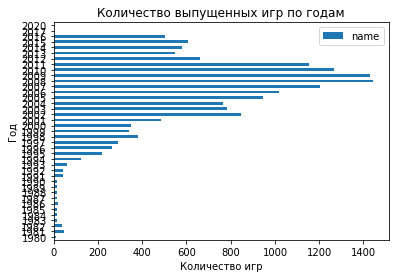

In [57]:
import matplotlib as plt
ax = df_game.groupby('year').agg({'name':'count'}).plot(kind='barh') 
ax.set(title='Количество выпущенных игр по годам', xlabel = 'Количество игр', ylabel='Год', label='count')
sns.set(rc={'figure.figsize':(12,10)})

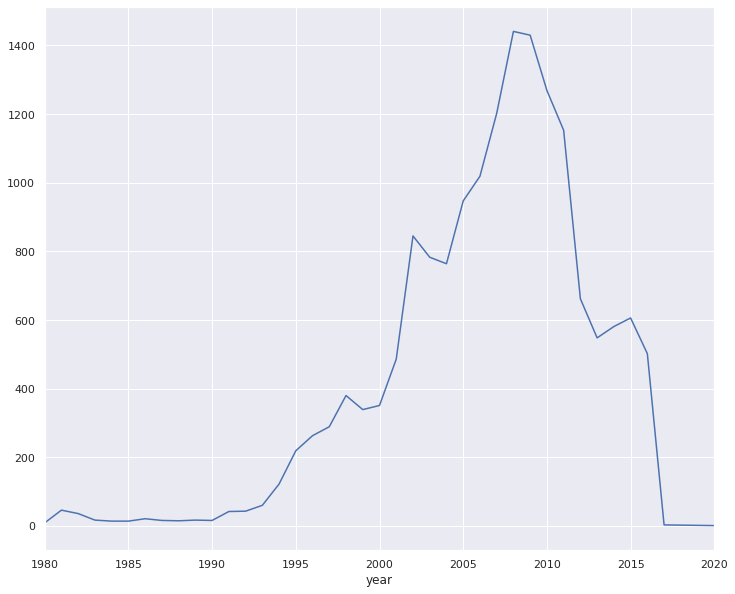

In [58]:
df_game.groupby('year')['name'].count().plot()

In [59]:
df_game['year'].value_counts().head()

2008    1441
2009    1430
2010    1269
2007    1202
2011    1153
Name: year, dtype: int64

# Вывод: максимальное количество игр было выпущено в 2008-2009 году.

---
---

# Постройте распределение по годам релиза для игр с отзывом и без отзыва; 
* Cравните полученные распределения и сделайте вывод

### Т.к. нет уточнения, за отсутствие отзывов принимаю строки с нулями в колонках critic_score и user_score

In [60]:
df_game['temp'] = np.where(((df_game['critic_score'] == 0) & (df_game['user_score'] ==0)), '0', '1')

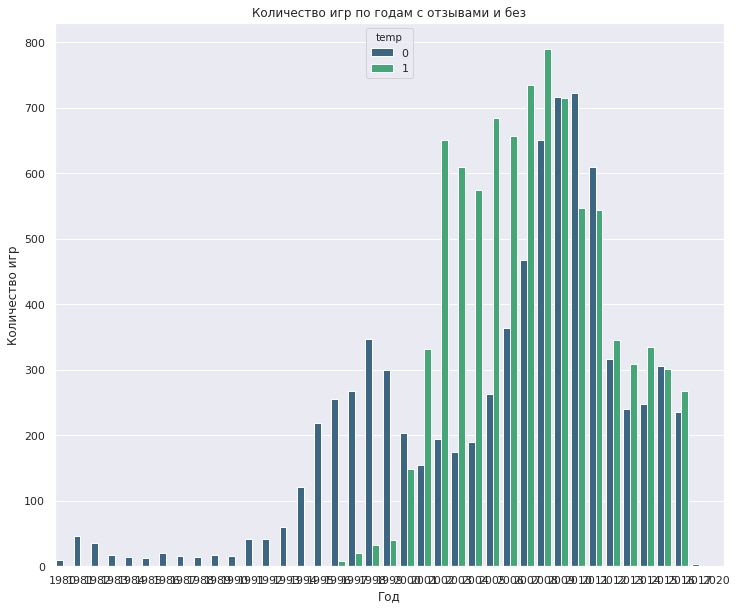

In [61]:
ax = sns.countplot(x='year', hue='temp', data=df_game, palette='viridis')
ax.set(title='Количество игр по годам с отзывами и без', xlabel = 'Год', ylabel='Количество игр', label='count')
sns.set(rc={'figure.figsize':(22,12)})
# temp = 1: есть отзыв
# temp = 0: нет отзыва

In [62]:
# удалим временную колонку для разделения по значению - есть отзывы/нет отзывов
df_game.drop('temp', axis =1, inplace = True)

# Вывод: количество игр без отзывов(рейтингов) выросло. В 2001-2008 гг,  большинство игр были оценено критиками и пользователями, но потом количество оцененных игр начало снижаться.

----
----

# Постройте график продаж по каждому году
* Cделайте вывод

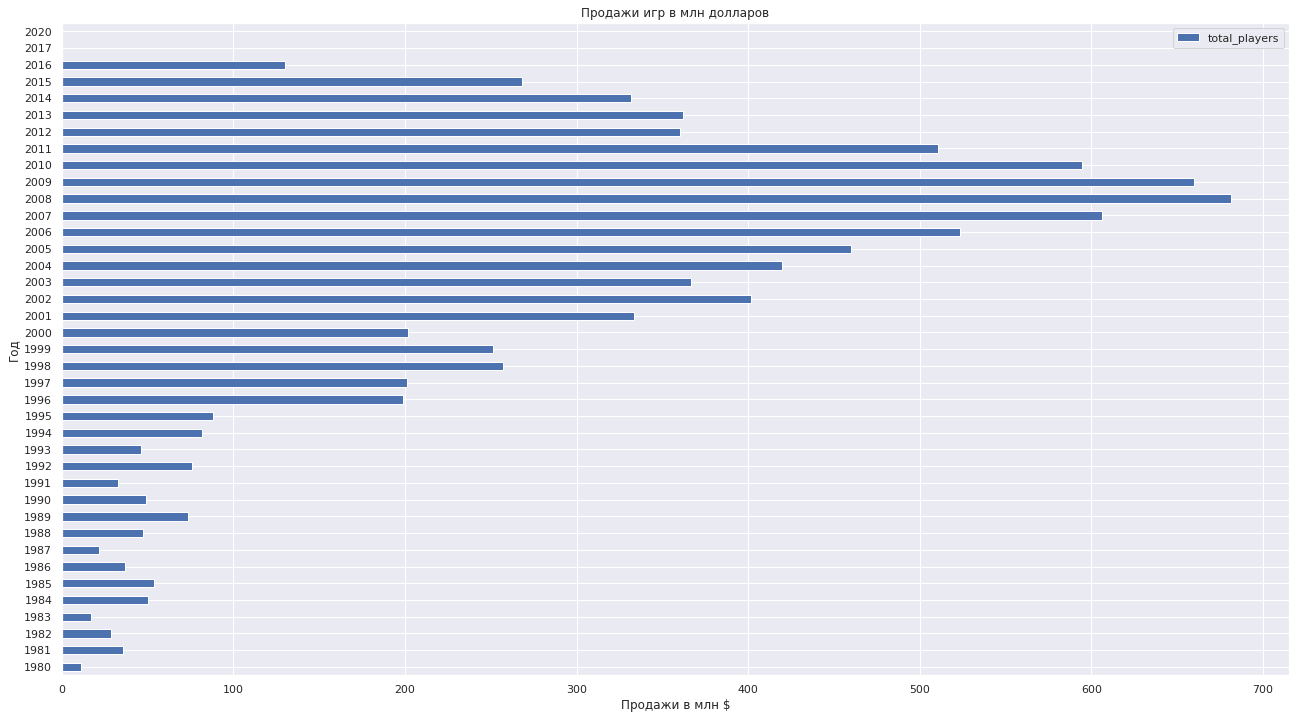

In [63]:
ax = df_game.groupby('year').agg({'total_players':'sum'}).plot(kind='barh') 
ax.set(title='Продажи игр в млн долларов', xlabel = 'Продажи в млн $', ylabel='Год', label='count')
sns.set(rc={'figure.figsize':(12,10)})

# Вывод: объем продаж игр снижается, пик продаж был в 2008 году

----
----

# Постройте ящик с усами по глобальным продажам, опишите полученный результат

### Вначале удалим выбросы, для этого использую функцию из второго проекта, которая удаляет значения ниже и выше 1,5*IQR

In [64]:
def delete_outliers(df, column,graphic=0,x=8,y=8):
    # Посчитаем первый и третий квантиль
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    # Посчитаем межквартильный размах
    iqr = q3 - q1
    # Отфильтруем по условию
    filter = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return df.loc[filter].boxplot([column], figsize=(x,y))
    else:
        return df.loc[filter]

In [65]:
df_game_wo_outliers = delete_outliers(df_game, 'total_players')

In [66]:
print(f'Удалено {df_game.shape[0] - df_game_wo_outliers.shape[0]} выбросов из {df_game.shape[0]} значений')

Удалено 1880 выбросов из 16571 значений


Text(0.5, 1.0, 'График box-plot по объему продаж в млн $')

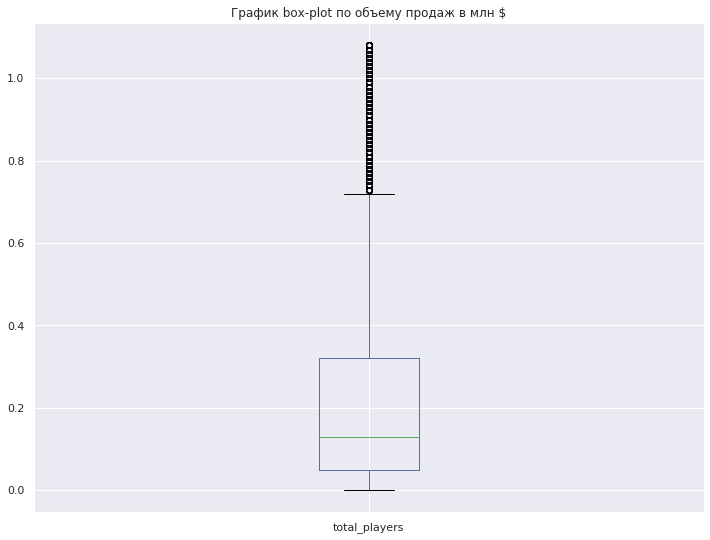

In [67]:
import matplotlib.pyplot as plt
plot = df_game_wo_outliers.boxplot('total_players', figsize=(12,9))
#plot.set_yticks(range(0, 2))
plt.title('График box-plot по объему продаж в млн $')

In [68]:
print(f'Медианное значение объема продаж одной игры составляет {df_game_wo_outliers.total_players.median()*1000000} $ \nОднако есть игры, объем продаж которых равен {df_game.total_players.max()*1000000:.2f} $')

Медианное значение объема продаж одной игры составляет 130000.0 $ 
Однако есть игры, объем продаж которых равен 82540000.00 $


# Вывод: медианное значение объема продаж средней игры составляет 130 000 $

---
---

# Узнайте, на какой платформе было выпущено больше всего игр

[Text(0, 0.5, 'Платформа'),
 Text(0.5, 0, 'Количество выпущенных игры'),
 Text(0.5, 1.0, 'Количество выпущенных игр по платформам')]

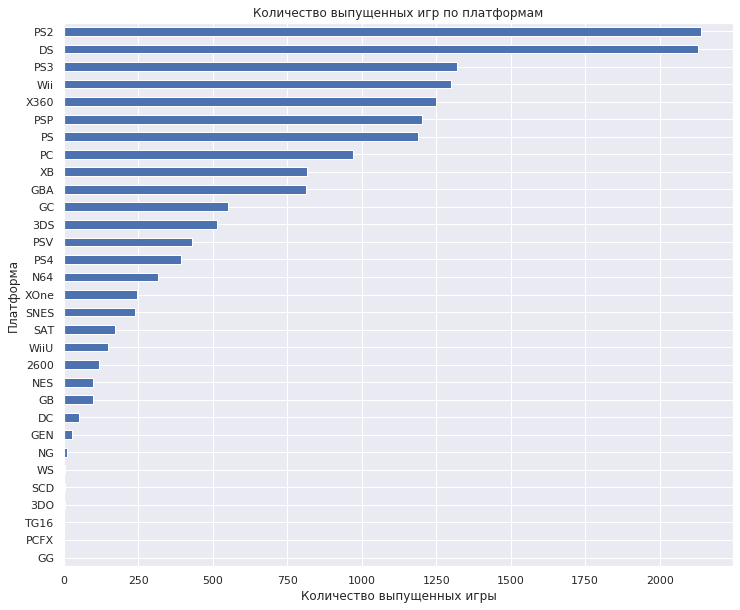

In [69]:
ax = df_game['platform'].value_counts().sort_values().plot(kind='barh') 
ax.set(title='Количество выпущенных игр по платформам', xlabel = 'Количество выпущенных игры', ylabel='Платформа')
#sns.set(rc={'figure.figsize':(12,10)})

In [70]:
df_game['platform'].value_counts().sort_values(ascending=False).head(1)

PS2    2140
Name: platform, dtype: int64

# Вывод: платформа-лидер по количеству выпущенных игр - Sony Playastation 2

---
---

# Определите, игр какого жанра больше всего

[Text(0, 0.5, 'Жанр'),
 Text(0.5, 0, 'Количество выпущенных игры'),
 Text(0.5, 1.0, 'Количество выпущенных игр по жанрам')]

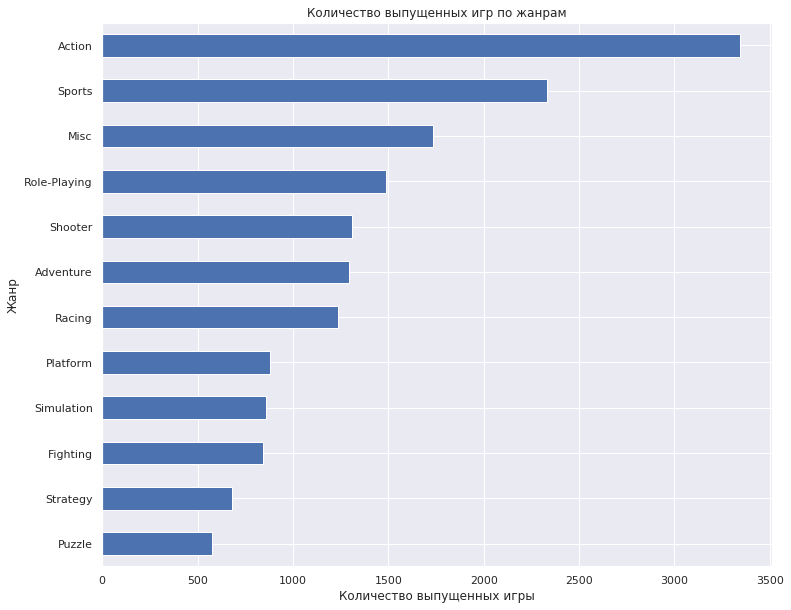

In [71]:
ax = df_game['genre'].value_counts().sort_values().plot(kind='barh') 
ax.set(title='Количество выпущенных игр по жанрам', xlabel = 'Количество выпущенных игры', ylabel='Жанр')

In [72]:
df_game['genre'].value_counts().sort_values(ascending=False).head(1)

Action    3343
Name: genre, dtype: int64

# Вывод: больше всего выпущено игр в жанре Action

----
----

# Найдите игры с наибольшей и наименьшей оценкой от пользователей
# Найдите игры с наибольшей и наименьшей оценкой от критиков

### Игры с наименьшей оценкой от пользователей

In [73]:
df_game.sort_values('user_score').head(10)[['name','user_score']]

,name,user_score
16718,Winning Post 8 2016,0.0
8841,J-League Victory Goal,0.0
8843,Countdown: The Game,0.0
8844,Spongebob Squarepants / Fairly Odd Parents Dou...,0.0
8845,Pro Baseball Spirits 2015,0.0
8847,History Civil War: Secret Missions,0.0
8849,Dark Rift,0.0
8850,Derby Stallion 64,0.0
8851,Doraemon 3: Nobi Dai no Machi SOS!,0.0
14768,Biohazard: Revival Selection,0.0


### Игры с наибольшей оценкой от пользователей

In [74]:
df_game.sort_values('user_score').tail(10)[['name','user_score']]

,name,user_score
8905,Shenmue II,9.398438
13289,Rock 'N Roll Racing,9.398438
5920,MLB SlugFest Loaded,9.500000
16550,Wade Hixton's Counter Punch,9.500000
1645,Golden Sun: The Lost Age,9.500000
10106,Cory in the House,9.500000
16631,Karnaaj Rally,9.500000
3417,Harvest Moon: Friends of Mineral Town,9.601562
8976,Boktai: The Sun is in Your Hand,9.601562
14414,Breath of Fire III,9.703125


### Игры с наименьшей оценкой от критиков

In [75]:
df_game.sort_values('critic_score').head(10)[['name','critic_score']]

,name,critic_score
8349,Digimon Story: Cyber Sleuth,0.0
10312,Grand Theft Auto: San Andreas,0.0
10313,The Penguins of Madagascar: Dr. Blowhole Retur...,0.0
10318,Happy Feet Two,0.0
10319,Victory Zone,0.0
10322,Cabela's Adventure Camp,0.0
10323,Goal Storm '97,0.0
10324,Paws & Claws: Pet Resort,0.0
10328,Pachi-Slot Aruze Oukoku 3,0.0
10329,Tournament Pool,0.0


### Игры с наибольшей оценкой от критиков

In [76]:
df_game.sort_values('critic_score').tail(10)[['name','critic_score']]

,name,critic_score
517,Metroid Prime,97.0
249,Tony Hawk's Pro Skater 3,97.0
42,Grand Theft Auto V,97.0
49,Super Mario Galaxy,97.0
129,Halo: Combat Evolved,97.0
38,Grand Theft Auto III,97.0
5350,SoulCalibur,98.0
57,Grand Theft Auto IV,98.0
51,Grand Theft Auto IV,98.0
227,Tony Hawk's Pro Skater 2,98.0


---
---

# Оцените корреляцию между оценками критиков и пользовательскими оценками.

In [77]:
df_game.query('user_score!= 0 & critic_score != 0')[['user_score','critic_score']].corr()

,user_score,critic_score
user_score,1.000000,0.580086
critic_score,0.580086,1.000000


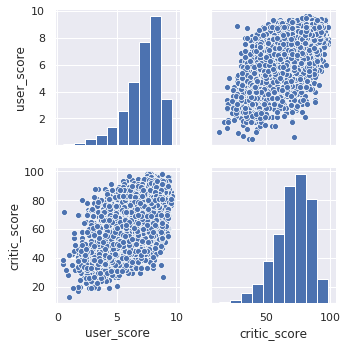

In [78]:
sns.pairplot(df_game.query('user_score!= 0 & critic_score != 0')[['user_score','critic_score']])

# Вывод: между critic_score и user_score наблюдается сильная линейная связь.  R(pearson) = 0.58

---
---

# Шаг 4. Составьте портрет пользователя для каждого региона

### Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:
* топ-5 предпочтительных жанров
* в какие года пользователи были наиболее активны (больше всего покупали игры)
* топ-5 предпочтительных платформ
* какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

In [79]:
def user_portrait(df, region):
    '''
    Рисуем графики для топ 5 жанров, платформ, годов и ESRB рейтингу по продажам игр, в зависимости от полученного региона
    '''
    items = ['genre','platform','year', 'rating']
    temp_dict = {'eu_players':'european players','ru_players':'russian players','na_players':'american players'}
    print('Top',items,'by sales for',temp_dict[region])
    temp = df_rating.merge(df, on='rating')
    for value in items:
        if value == 'rating':
            ax = temp.groupby('decryption').agg({region:'sum'}).sort_values(region, ascending=False).head(5).plot(kind='barh')
            ax.set(xlabel = 'sales in million $', ylabel=value, title=f'Top 5 ESRB {value} for {temp_dict[region]}')
        else:
            ax = df.groupby(value).agg({region:'sum'}).sort_values(region, ascending=False).head(5).plot(kind='barh')
            ax.set(xlabel = 'sales in million $', ylabel=value, title=f'Top 5 {value} for {temp_dict[region]}')

# Топ для Европы

Top ['genre', 'platform', 'year', 'rating'] by sales for european players


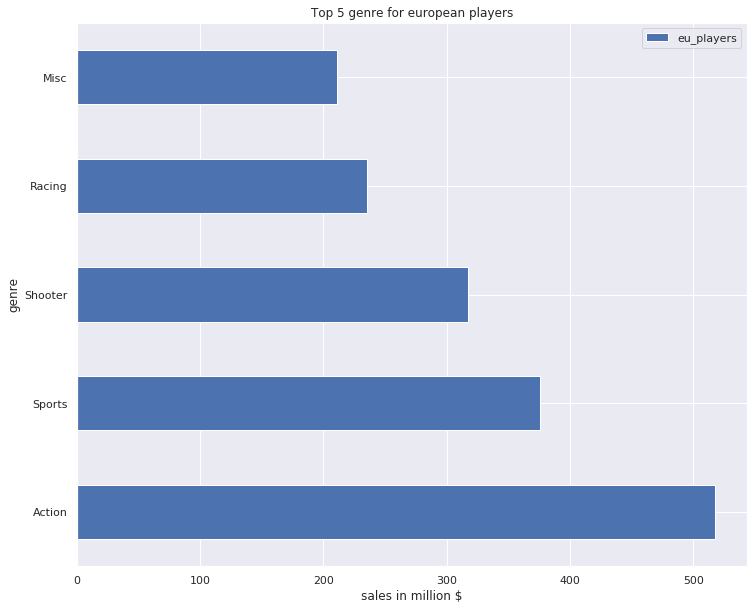

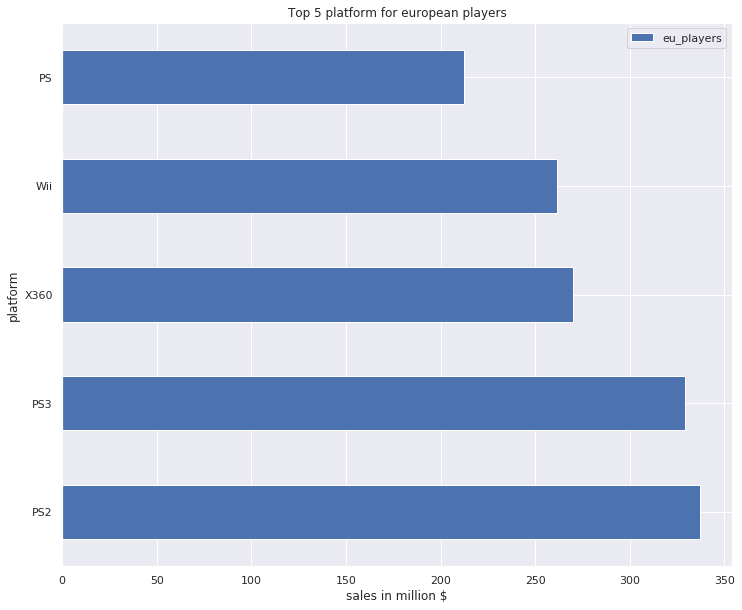

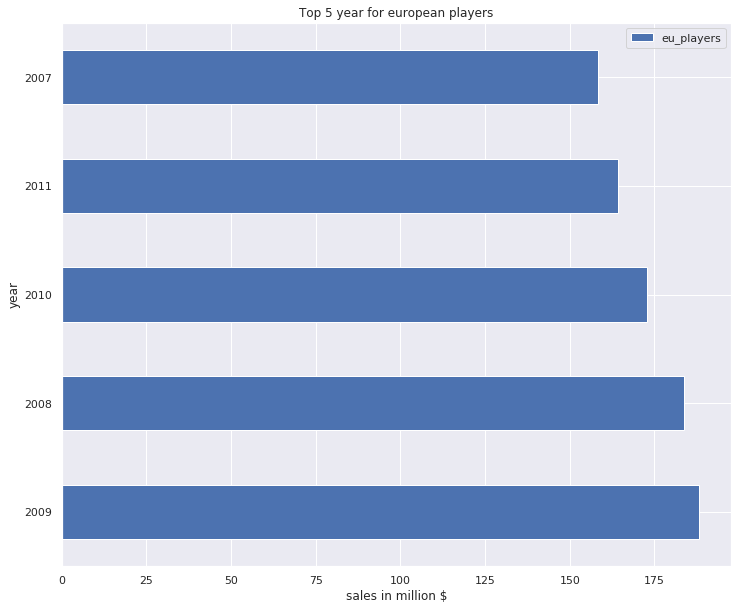

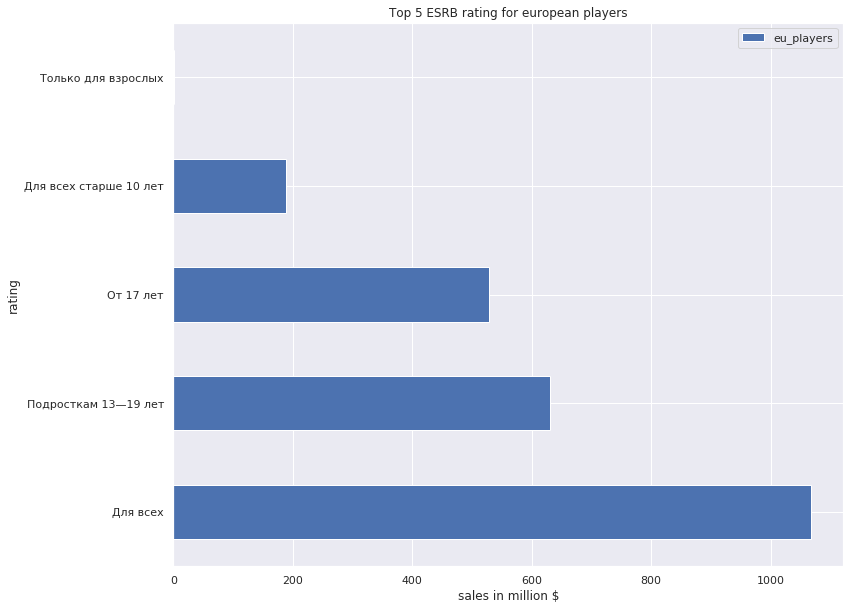

In [80]:
user_portrait(df_game,'eu_players')

---
---

# Топ для России

Top ['genre', 'platform', 'year', 'rating'] by sales for russian players


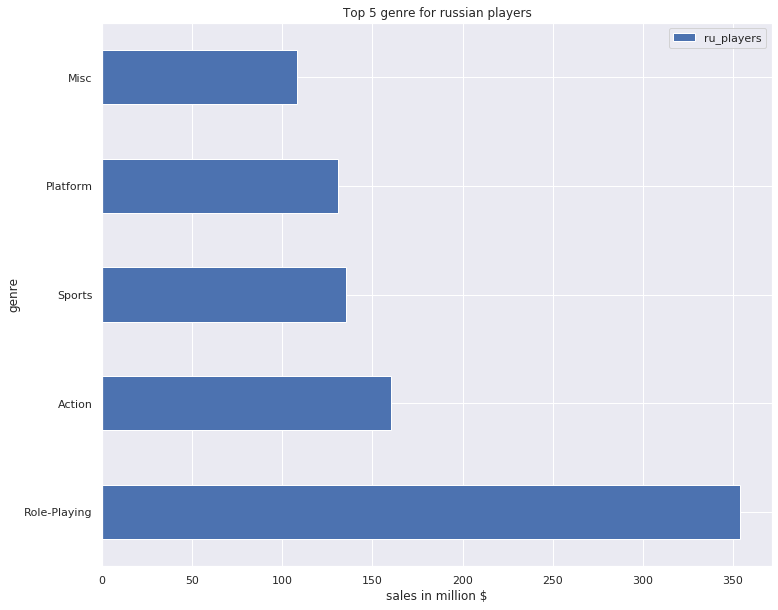

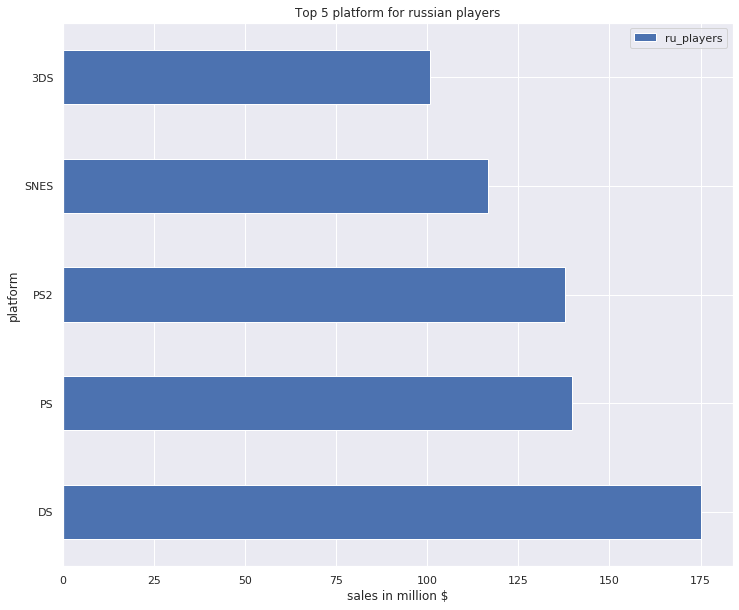

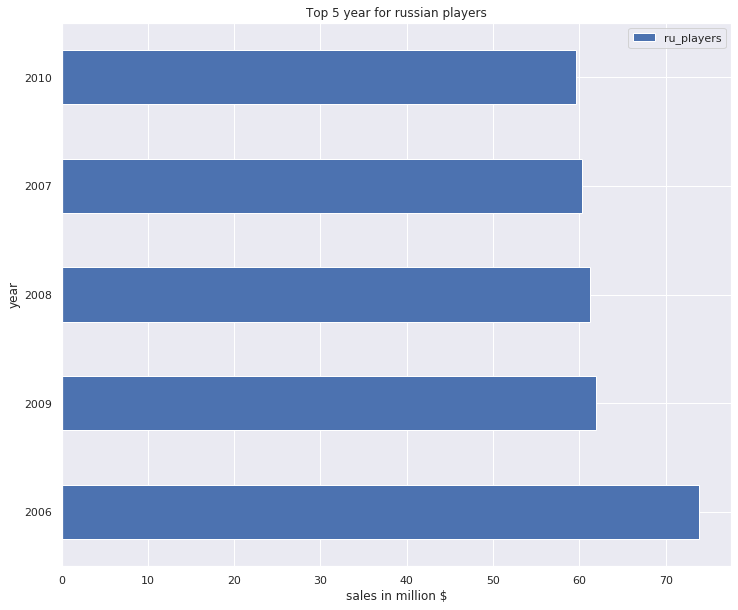

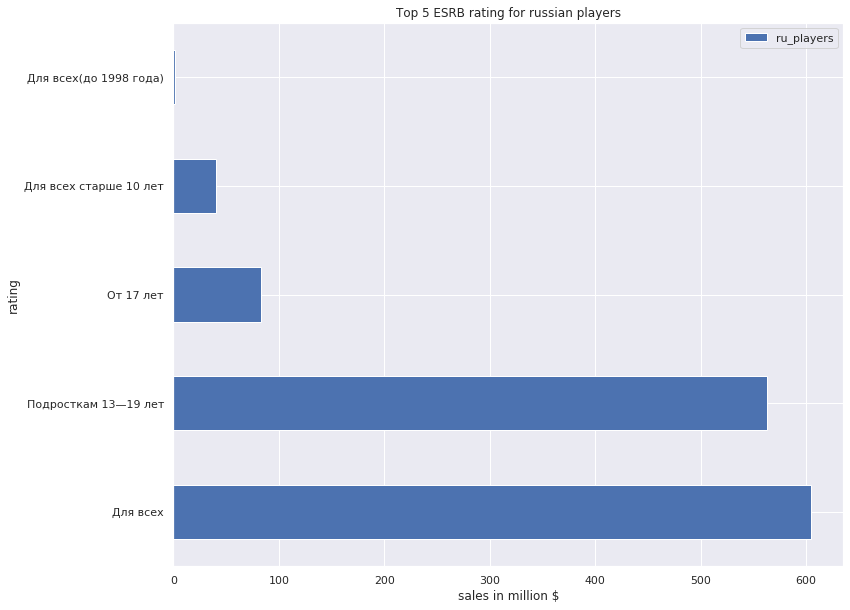

In [81]:
user_portrait(df_game,'ru_players')

---
---

## Топ для Северной Америки

Top ['genre', 'platform', 'year', 'rating'] by sales for american players


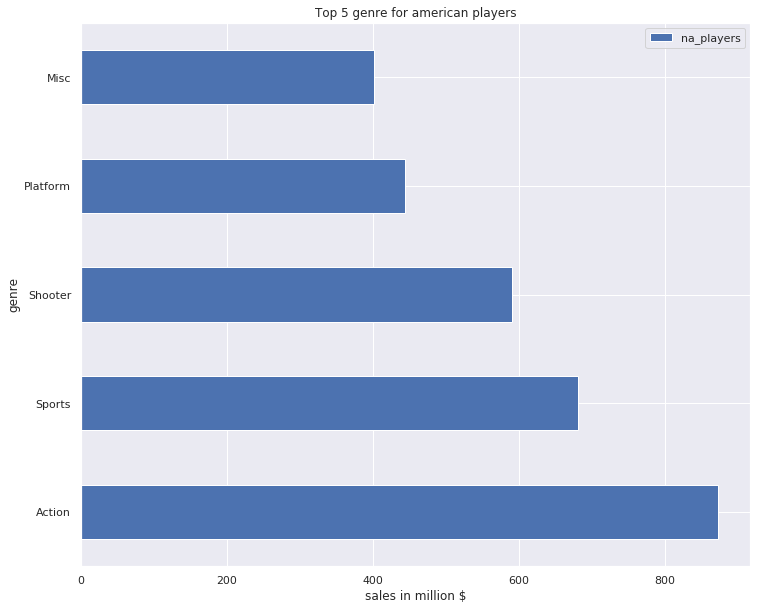

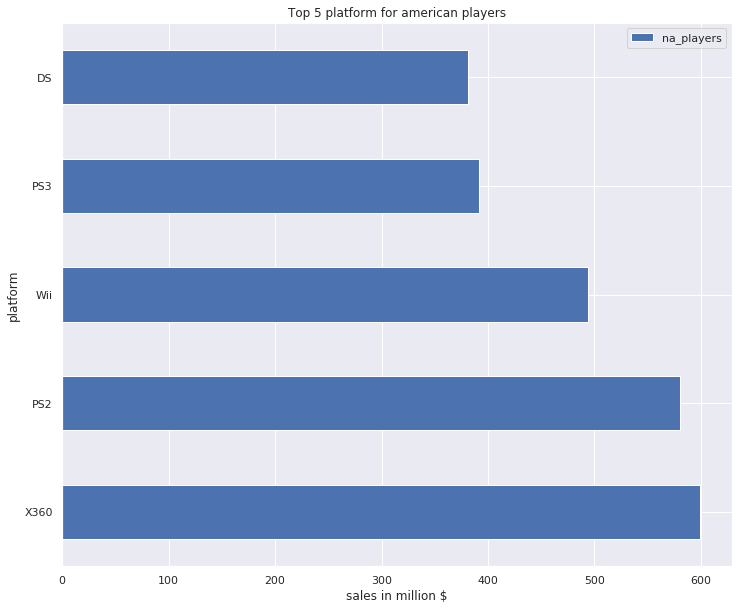

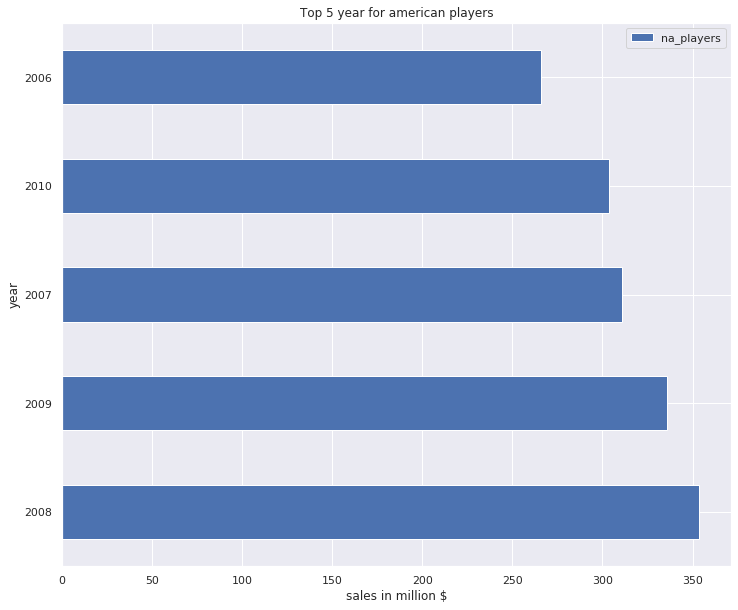

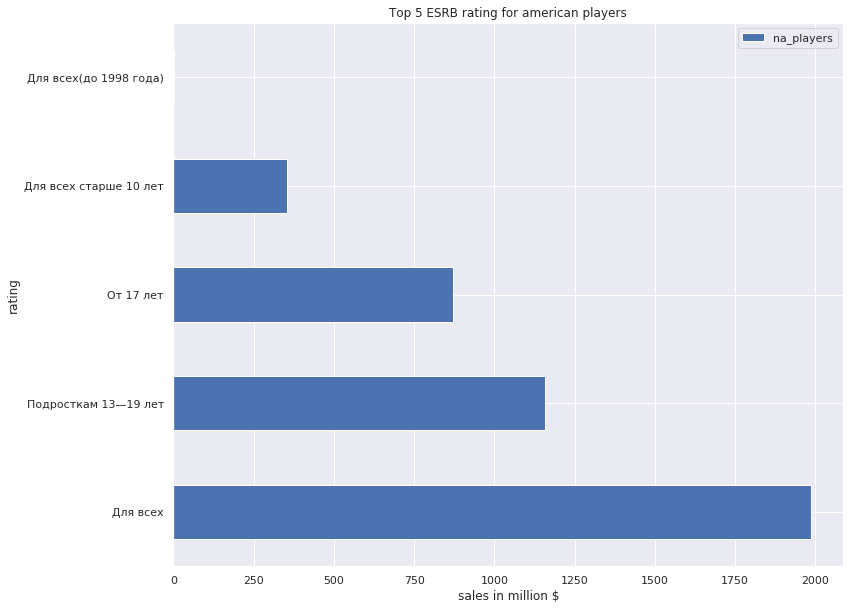

In [82]:
user_portrait(df_game,'na_players')

---
---

# Шаг 5. Проверьте гипотезы:
### 1. средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
### 2. средний пользовательский рейтинг жанров Action и Sports различается.
* Пороговое значение alpha задайте самостоятельно.
* __Поясните:__
* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.

---

# Проверим гипотезу, что средний пользовательский рейтинг платформ PS2 и PS3 одинаковый

### H0: mean(user_score for PS2 platform) = mean(user_score for PS3 platform)
### H1: mean(user_score for PS2 platform) != mean(user_score for PS3 platform)
### alpha = 0.05

In [83]:
'''
Функция для визуализации распределений и рассчета средних статистик
Пример аргументов:
met: platform
filter_str_1: PS2
filter_column: user_score
'''
def viz_and_mean(df, filter_str_1, filter_str_2, filter_column, met, viz=0):
    temp_1 = df[df[met] == filter_str_1]
    temp_2 = df[df[met] == filter_str_2]
    print (f'Средняя ({filter_column}) для {filter_str_1} {met} = {temp_1[filter_column].mean()}')
    print (f'Средняя ({filter_column}) для {filter_str_2} {met} = {temp_2[filter_column].mean()}')
    if viz == 1:
        f, axes = plt.subplots(2, 2, figsize=(14, 9), sharex=True, )
        ax = sns.distplot( temp_1[filter_column] , color="skyblue", ax=axes[0, 0], axlabel=f'{filter_column} for {filter_str_1} histogram')
        sns.distplot(temp_2[filter_column], color="olive", ax=axes[0, 1], axlabel=f'{filter_column} for {filter_str_2} histogram')

### Рассчитаем статистики и построим распределения

Средняя (user_score) для PS2 platform = 7.62890625
Средняя (user_score) для PS3 platform = 6.72265625


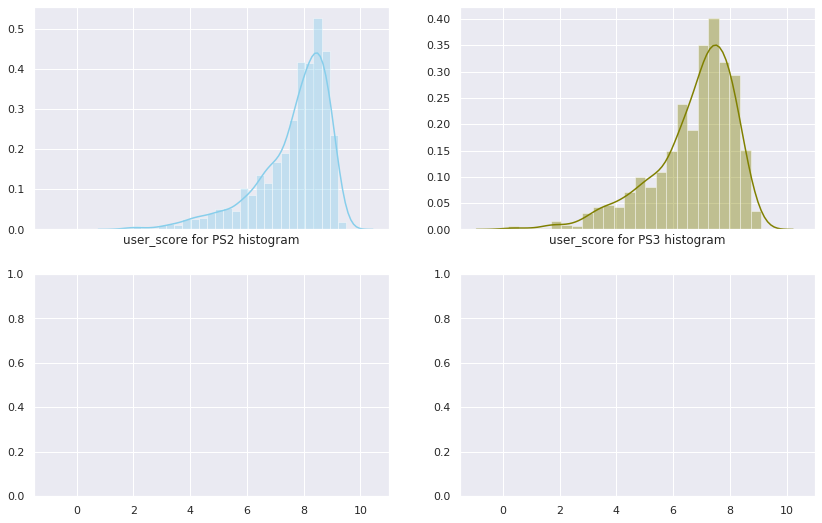

In [84]:
viz_and_mean(df_game.query('user_score != 0'), 'PS2','PS3', 'user_score', 'platform', 1)

In [85]:
df_game[(df_game['platform']=='PS2') & (df_game['user_score'] != 0)].shape[0]

1231

In [86]:
df_game[(df_game['platform']=='PS3') & (df_game['user_score'] != 0)].shape[0]

870

### Т.к. число наблюдений в обоих выборках больше 50 и выборки независимы, для проверки равенства средних используем t-Стьюдента для независимых выборок

In [87]:
from scipy import stats as st
results = st.ttest_ind(df_game[(df_game['platform']=='PS2') & (df_game['user_score'] != 0)]['user_score'], df_game[(df_game['platform']=='PS3') & (df_game['user_score'] != 0)]['user_score'], equal_var = False)
print(f'Вероятность получить такие или более выраженные значения, при условии что отличий нет (p-value): {results.pvalue}')

Вероятность получить такие или более выраженные значения, при условии что отличий нет (p-value): 4.8262915975157736e-46


# Вывод: уверенно отклоняем нулевую гипотезу, средний пользовательский рейтинг для игр PS2 != среднему пользовательскому рейтингу для играм PS3. P-value: 4.8263e-46

---
---

# Проверьте гипотезу, что средний пользовательский рейтинг жанров Action и Sports различается.
### H0: mean(user_score for genre Action) = mean(user_score for genre Sports)
### H1: mean(user_score for genre Action) != mean(user_score for genre Sports)
### alpha = 0.05

---

### Рассчитаем статистики и построим распределения

Средняя (user_score) для Action genre = 7.0546875
Средняя (user_score) для Sports genre = 6.95703125


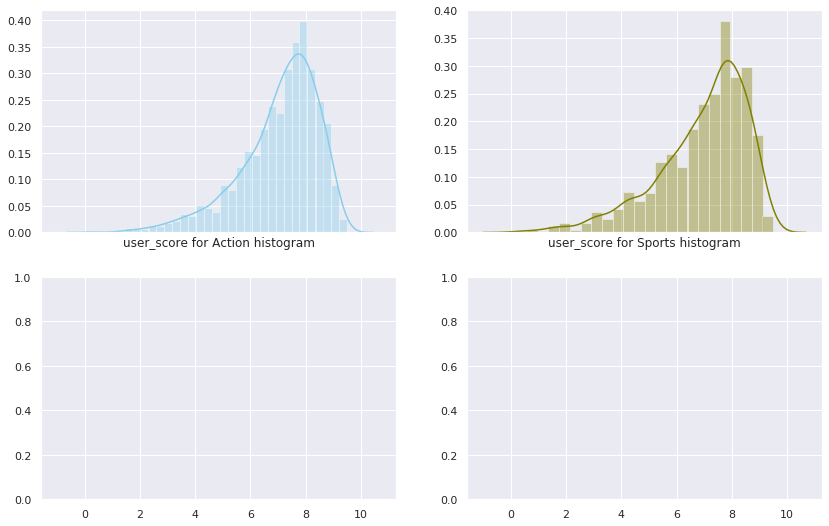

In [88]:
viz_and_mean(df_game.query('user_score != 0'), 'Action','Sports', 'user_score', 'genre', 1)

In [89]:
df_game[(df_game['genre']=='Sports') & (df_game['user_score'] != 0) ]['user_score'].shape[0]

1098

In [90]:
df_game[(df_game['genre']=='Action') & (df_game['user_score'] != 0)]['user_score'].shape[0]

1820

### Т.к. число наблюдений в обоих выборках больше 50 и выборки независимы, для проверки равенства средних используем t-Стьюдента для независимых выборок

In [ ]:
from scipy import stats as st
results = st.ttest_ind(df_game[(df_game['genre']=='Sports') & (df_game['user_score'] != 0)]['user_score'], df_game[(df_game['genre']=='Action') & (df_game['user_score'] != 0)]['user_score'], equal_var = False)
print(f'Вероятность получить такие или более выраженные значения, при условии что отличий нет (p-value): {results.pvalue:.10f}')

# Вывод: не получилось отвергнуть нулевую гипотезу, средний пользовательский рейтинг для жанра Sports ~= среднему пользовательскому рейтингу для жанра Action
* Средний (user_score) для Action genre = 7.0546875
* Средний (user_score) для Sports genre = 6.95703125

In [ ]:
# Код наставника
df_game[(df_game['user_score']!=0) & (df_game['genre'].isin(['Action', 'Sports']))]\
.groupby('genre')['user_score'].mean()

----
----
----
----

# Шаг 6. Напишите общий вывод

### 1. Наибольшее количество игр было выпущено в 2008 и 2009 годах (по убыванию);

### 2. Объем продаж игр снижается, пик продаж был в 2008 году (исходя из нашей выборки);

### 3. Медианное значение объема продаж какой-либо игры составляет 130 000 долларов;

### 4. Sony Playastation 2 - платформа-лидер по количеству выпущенных игр;

### 5. Action - жанр, в котором, выпущено больше всего игр; 

### 6. Между оценками критиков и оценками пользователей наблюдается сильная линейная связь, r pearson = 0.58. Кто-то из них основывается на рейтингах других, но корреляция не говорит о причинно следственной связи.

### 7. Нулевую гипотезу о равенстве средних пользовательских рейтингах на платформе PS2 и PS3, уверенно отвергаем. 
* Средний user_score для PS2 > среднего рейтинга user_score PS3. 
* P-values: 4.827e-46
* PS2 mean user_score = 7.62890625
* PS3 mean user_score = 6.72265625

### 8. Не удалось отвергнуть нулевую гипотезу о равенстве среднего user_score в жанре Action и Sports. Средний пользовательский рейтинг игр для жанра Sports примерно равен среднему пользовательскому рейтингу для игр жанра Action. 
* Средний user_score в жанре Action ~= среднему user_score в жанре Sports
* P-value: 0.0980428541
* Action mean user_score    7.054688
* Sports mean user_score    6.957031